# 6. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

### 1.2 Example of simple linear regression

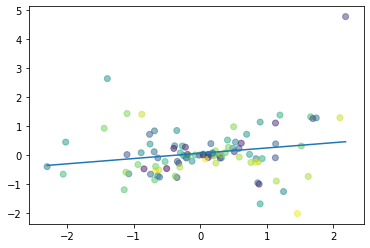

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 100
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [17]:
np.polyfit(x, y, 1)

array([0.1823514 , 0.07297668])

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [18]:
x_values = [i for i in range(11)]

In [19]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [21]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [22]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

$y = 2x + 1$

In [23]:
y_values = [2*i + 1 for i in x_values]

In [24]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [25]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [26]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [27]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [28]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [29]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### 2.3 Building Model

**Critical Imports**

In [30]:
import torch
import torch.nn as nn
from torch.autograd  import Variable

**Create Model**
1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1 $
        - Output $\hat y = ?$

In [31]:
# Create class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
        
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [32]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [33]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [28]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [29]:
epochs = 100

In [30]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 168.3192138671875
epoch 2, loss 14.446228981018066
epoch 3, loss 1.8872913122177124
epoch 4, loss 0.8549817800521851
epoch 5, loss 0.7629508376121521
epoch 6, loss 0.7477030158042908
epoch 7, loss 0.7388051748275757
epoch 8, loss 0.7305099368095398
epoch 9, loss 0.7223491668701172
epoch 10, loss 0.7142822742462158
epoch 11, loss 0.7063060998916626
epoch 12, loss 0.6984187960624695
epoch 13, loss 0.6906198859214783
epoch 14, loss 0.6829073429107666
epoch 15, loss 0.6752815246582031
epoch 16, loss 0.6677409410476685
epoch 17, loss 0.6602842807769775
epoch 18, loss 0.6529112458229065
epoch 19, loss 0.6456201076507568
epoch 20, loss 0.6384106278419495
epoch 21, loss 0.6312816143035889
epoch 22, loss 0.6242322325706482
epoch 23, loss 0.6172615885734558
epoch 24, loss 0.610368549823761
epoch 25, loss 0.6035523414611816
epoch 26, loss 0.5968130826950073
epoch 27, loss 0.5901482701301575
epoch 28, loss 0.5835585594177246
epoch 29, loss 0.5770419239997864
epoch 30, loss 0.57059806

**Compare Data**

In [34]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[-0.14972985],
       [-0.65830386],
       [-1.1668779 ],
       [-1.6754519 ],
       [-2.1840258 ],
       [-2.6925998 ],
       [-3.2011738 ],
       [-3.7097478 ],
       [-4.218322  ],
       [-4.726896  ],
       [-5.23547   ]], dtype=float32)

In [35]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot Graph**

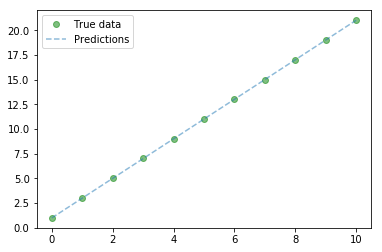

In [21]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [22]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

**Load Model**

In [23]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



**CPU Summary**

In [38]:
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 73.18451690673828
epoch 2, loss 5.985538959503174
epoch 3, loss 0.5041545629501343
epoch 4, loss 0.05687737837433815
epoch 5, loss 0.020218120887875557
epoch 6, loss 0.017053989693522453
epoch 7, loss 0.01662381738424301
epoch 8, loss 0.016418633982539177
epoch 9, loss 0.01623370498418808
epoch 10, loss 0.016052303835749626
epoch 11, loss 0.01587309129536152
epoch 12, loss 0.01569577492773533
epoch 13, loss 0.01552051305770874
epoch 14, loss 0.015347188338637352
epoch 15, loss 0.015175800770521164
epoch 16, loss 0.015006366185843945
epoch 17, loss 0.0148388110101223
epoch 18, loss 0.014673059806227684
epoch 19, loss 0.014509259723126888
epoch 20, loss 0.014347226358950138
epoch 21, loss 0.014186990447342396
epoch 22, loss 0.014028581790626049
epoch 23, loss 0.013871856965124607
epoch 24, loss 0.013716998510062695
epoch 25, loss 0.013563812710344791
epoch 26, loss 0.013412341475486755
epoch 27, loss 0.01326261181384325
epoch 28, loss 0.013114461675286293
epoch 29, loss 0.0

GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [25]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 336.0314025878906
epoch 2, loss 27.67657470703125
epoch 3, loss 2.5220539569854736
epoch 4, loss 0.46732547879219055
epoch 5, loss 0.2968060076236725
epoch 6, loss 0.2800087630748749
epoch 7, loss 0.27578213810920715
epoch 8, loss 0.2726128399372101
epoch 9, loss 0.269561231136322
epoch 10, loss 0.2665504515171051
epoch 11, loss 0.2635740041732788
epoch 12, loss 0.26063060760498047
epoch 13, loss 0.2577202618122101
epoch 14, loss 0.2548423111438751
epoch 15, loss 0.25199657678604126
epoch 16, loss 0.24918246269226074
epoch 17, loss 0.24639996886253357
epoch 18, loss 0.24364829063415527
epoch 19, loss 0.24092751741409302
epoch 20, loss 0.2382371574640274
epoch 21, loss 0.23557686805725098
epoch 22, loss 0.2329462170600891
epoch 23, loss 0.2303449958562851
epoch 24, loss 0.22777271270751953
epoch 25, loss 0.2252292037010193
epoch 26, loss 0.22271405160427094
epoch 27, loss 0.22022713720798492
epoch 28, loss 0.21776780486106873
epoch 29, loss 0.21533599495887756
epoch 30, lo

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`